In [1]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas  as pd
import utils 

Caricamento dei datasets

In [2]:
#Carico i datasets
audio_files_target = utils.load_dataset('Dataset/Target')
audio_files_nonTarget = utils.load_dataset('Dataset/Non-Target')   

Estrazione delle frequenze di campionamento e plot delle stesse

In [ ]:
#TODO analisi per il resembling shannon Nyquist 
frequenciesTarget = utils.extractFrequencies(audio_files_target)
frequenciesNonTarget = utils.extractFrequencies(audio_files_nonTarget)
    
min = np.min(frequenciesTarget)
max = np.max(frequenciesTarget)

print(min, max)

min = np.min(frequenciesNonTarget)
max = np.max(frequenciesNonTarget)

print(min, max)

utils.plotFrequencies(frequenciesTarget,frequenciesNonTarget)

Caricamento dataset nel dataframe

In [3]:
df_paths, df_names = utils.create_dataframe_from_files("Dataset")

In [4]:
df_paths, df_names

(                                               FilePath
 0                                 Dataset\duplicate.txt
 1                        Dataset\duplicate_indices.json
 2     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 3     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 4     Dataset\Non-Target\Ambient Noise\2f574049-3325...
 ...                                                 ...
 2660  Dataset\Target\Vessel\SanctSound_OC01_03_ship_...
 2661  Dataset\Target\Vessel\SanctSound_OC02_01_ship_...
 2662  Dataset\Target\Vessel\SanctSound_OC03_02_ship_...
 2663  Dataset\Target\Vessel\SanctSound_SB03_09_vesse...
 2664               Dataset\Target\Vessel\ship_small.mp3
 
 [2665 rows x 1 columns],
                                             FileName
 0                                      duplicate.txt
 1                             duplicate_indices.json
 2           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 3           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 4           2f574

Ricerca ed eliminazione dei duplicati

In [5]:
duplicate_indices = utils.find_duplicates(df_names)
print(duplicate_indices)

{'72021005.wav': [107, 213], '7202100T.wav': [108, 215], '7202100V.wav': [109, 216], '7202100Z.wav': [110, 217], '7702800U.wav': [958, 1565], '7702800V.wav': [959, 1566], '7702800X.wav': [960, 1567], '7702801F.wav': [966, 1568], '7702801M.wav': [969, 1569], '78018002.wav': [112, 218], '78018003.wav': [113, 219], '7801800B.wav': [115, 220], '7801800D.wav': [116, 221], '7801800H.wav': [117, 222], '7801800J.wav': [118, 223], '84016002.wav': [1465, 1577], '8401600B.wav': [1466, 1578], '84021003.wav': [1234, 1581], '91012009.wav': [1002, 1605], '9101200B.wav': [1003, 1606], '9101200K.wav': [1006, 1607], '9101201E.wav': [1011, 1608], '91012022.wav': [1017, 1609], '91012048.wav': [1046, 1610], '91012049.wav': [1047, 1611]}


Salvataggio del dizionario in un file json

In [6]:
import json

# Convert the dictionary to a JSON string
duplicate_indices_json = json.dumps(duplicate_indices)

# Write the JSON string to a file
with open('Dataset/duplicate_indices.json', 'w') as f:
    f.write(duplicate_indices_json)

Eliminazione duplicati

In [7]:
# Remove the duplicate rows
df_paths, df_names = utils.remove_rows(df_paths, df_names, 'Dataset/duplicate.txt', 'Dataset/df_paths.csv', 'Dataset/df_names.csv')

In [8]:
df_names, df_paths

(                                            FileName
 0                                      duplicate.txt
 1                             duplicate_indices.json
 2           0f9867d8-fcf7-40d1-b846-3f7fb8100eb7.mp3
 3           2b68b3a9-7c0d-4452-bbe5-cc99b5d4fb61.mp3
 4           2f574049-3325-446c-a8ac-2e5b31e9e32f.mp3
 ...                                              ...
 2660    SanctSound_OC01_03_ship_20191106T223751Z.wav
 2661    SanctSound_OC02_01_ship_20190419T233040Z.wav
 2662    SanctSound_OC03_02_ship_20200228T080107Z.wav
 2663  SanctSound_SB03_09_vessel_20200415T161235Z.wav
 2664                                  ship_small.mp3
 
 [2638 rows x 1 columns],
                                                FilePath
 0                                 Dataset\duplicate.txt
 1                        Dataset\duplicate_indices.json
 2     Dataset\Non-Target\Ambient Noise\0f9867d8-fcf7...
 3     Dataset\Non-Target\Ambient Noise\2b68b3a9-7c0d...
 4     Dataset\Non-Target\Ambient Noise

In [ ]:
#TODO dirgli di aggiornare il file di metadata, ci sono 1973 file su 2638
# TODO Vedere la frequenza massima di ogni audio,analisi canali e bitrate, e controllare il contenuto di tali frequenze e decidere se continuare ad abbassare il range di frequenze. Cercare di ridurre il più possibile. Secondo benedetto 192Khz.  

Estrazione delle durate degli audio e plot della distribuzione delle stesse

In [9]:
audio_durations = utils.extract_durations('Dataset/df_paths.csv')

In [10]:
audio_durations

[31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 31.207619047619048,
 20.0,
 9.99297052154195,
 8.668526077097505,
 10.29297052154195,
 9.993015873015873,
 19.993015873015874,
 37.24267573696145,
 5.0,
 11.00625850340136,
 3.528027210884354,
 3.528027210884354,
 3.528027210884354,
 1.7639909297052154,
 1.7639909297052154,
 1.7639909297052154,
 3.528027210884354,
 2.646031746031746,
 3.528027210884354,
 1.222721088435374,
 1.5208163265306123,
 1.2325170068027211,
 1.1168707482993196,
 1.166485260770975,
 1.4574603174603176,
 1.096780045351474,
 1.7937414965986394,
 1.4622222222222223,
 0.8645804988662131,
 0.9822222222222222,
 1.8723356009070296,
 1.330204081632653,
 1.3526077097505669,
 1.451111111111111,
 58.623174603174604,
 1.9212244897959183,
 1.7978231292517006,
 1.6121995464852608,
 1.6651700680272108,
 1.6824489795918367,
 1.5510204081632653,
 1.339501133786848,
 1.4241269841269841,
 1.5369160997732427,
 1.2408163265306122,
 1.5792290249433107

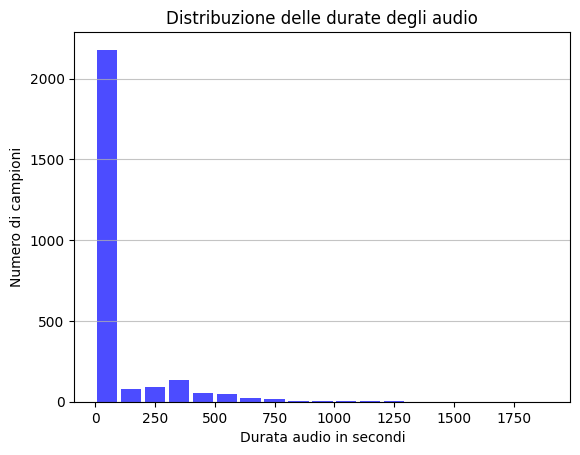

In [11]:
utils.plot_durations(audio_durations)

Il trim andrebbe fatto intorno ai 750 secondi? La maggior parte dei campioni è distribuita entro quel valore